<a href="https://colab.research.google.com/github/SelgiAgilsa/Tugas2-Clustering-Snsscrapetweet/blob/main/Tugas_snsscrapetweet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Klastering data twitter menggunakan keyword "narkoba" 
Start= 2022–09–15
End = 2022–10–15

**Install library snscrape**. Snscrape is a Python library that can be used to scrape tweets through Twitter's API without any restrictions or request limits.

In [21]:
!pip3 install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Install library langdetect.**

In [22]:
pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Import snscrape.modules.twitter and json.** The packages you will need.

In [23]:
import snscrape.modules.twitter as sntwitter
import json
from langdetect import detect

**Specify your query parameters.**

In [24]:
keywords=['narkoba']
start="2022–09–15"
end ="2022–10–15"
max_num=10
fname='tweet.json' 
languages=['id','en']

**Import library Panda.**

In [25]:
import pandas as pd
datatwitter=[]

**Then starting crawling.**

In [26]:
for keyword in keywords:
   
    for i, tweet in enumerate (sntwitter.TwitterSearchScraper(f'{keyword} ').get_items()):
        
        try:
            lan=detect(tweet.content)
        except:
            lan='error'
        if i == max_num:
            break
        if lan in languages:
            data = {'id': tweet.id, 'username':tweet.username, 'date': tweet.date, 'text': tweet.content,'url':tweet.url}
           # print(data)
            datatwitter.append(tweet.content)
            with open(fname, 'a+', encoding='utf-8') as f:
                line = json.dumps(data, ensure_ascii=False,default=str)
                #print(line)
                f.write(line)
                f.write('\n')

In [27]:
datatwitter

['Sosok AKBP Dody Prawiranegara, Mantan Kapolres Bukittinggi Terlibat Narkoba bersama Teddy Minahasa\n \nTangkap dan bui seumur hidup...selesai!\nhttps://t.co/pJQCAQfAZs lewat @tribunnews',
 '@imanlagi Masih tidak percaya isilop.\nPaling gak, sekarang. Mau dia dapet ZI WBK WBBM kek, tetep aje. Mereka boleh aua nangkep bandar judi online, narkoba dll, tp percuma kalo laporan kehilangan motor, HP, mobil, pelecehan seksual gak digubris.',
 'Just posted a photo https://t.co/IrQxzLlH1w',
 '@eLAmaravati Lalu gue &amp; temen2 yg lain.Sering menasehati dia untuk ga ikut pake narkoba :biarin kedua orang tua lu pemake narkoba asal elu dan adik lu jangan.akhirnya\nPapanya ketangkep polisi mamanya OD.temen gue &amp; adiknya pindah ke bogor ikut sama neneknya.rumahnya di jual',
 '@knpiharis @jokowi @mohmahfudmd @DivHumas_Polri @ListyoSigitP Sulit keadilan ditegakkan dibumi Pertiwi jika polisi sekelas Irjen pol bisnis narkoba.\n\nPantas kerja polisi amburadul , yang benar ditangkap dan dipermalukan 

**Install Sastrawi.** Library Sastrawi merupakan library sederhana yang dapat mengubah kata berimbuhan bahasa Indonesia menjadi bentuk dasarnya.

In [28]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Melakukan proses stemming, melakukan proses penghilangan stopword,
melakukan penghilangan karakter yang tidak bermakna.**

In [29]:
import re
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()# stemming process
# import StopWordRemoverFactory class
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
documents_clean=[]

for d in datatwitter:
    outputstem= stemmer.stem(d)
    d= stopword.remove(outputstem)
    # Remove Unicode
    document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
    # Remove Mentions
    document_test = re.sub(r'@\w+', '', document_test)
    # Lowercase the document
    document_test = document_test.lower()
    # Remove punctuations
    document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
    # Lowercase the numbers
    document_test = re.sub(r'[0-9]', '', document_test)
    # Remove the doubled space
    outputstop = re.sub(r'\s{2,}', ' ', document_test)
    documents_clean.append(outputstop)

In [30]:
documents_clean[0:5]

['sosok akbp dody prawiranegara mantan kapolres bukittinggi libat narkoba sama teddy minahasa tangkap bui umur hidup selesai https t co pjqcaqfazs lewat tribunnews',
 'imanlagi tidak percaya isilop paling gak sekarang mau dapet zi wbk wbbm kek tetep aje boleh aua nangkep bandar judi online narkoba tp percuma kalo lapor hilang motor hp mobil leceh seksual gak gubris',
 'just posted a photo https t co irqxzllhw',
 'elamaravati lalu gue amp temen yg sering nasehat untuk ga ikut pake narkoba biarin orang tua lu pemake narkoba asal elu adik lu jangan akhir papa ketangkep polisi mama od temen gue amp adik pindah bogor ikut sama nenek rumah jual',
 'knpiharis jokowi mohmahfudmd divhumas polri listyosigitp sulit adil tegak bumi pertiwi polisi kelas irjen pol bisnis narkoba pantas kerja polisi amburadul benar tangkap malu yg salah biar liar contoh kasus km akan tak dosa cabut nyawa anak bangsa']

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidfvectorizer = TfidfVectorizer(analyzer='word')
tfidf_wm = tfidfvectorizer.fit_transform(documents_clean)
tfidf_tokens = tfidfvectorizer.get_feature_names()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

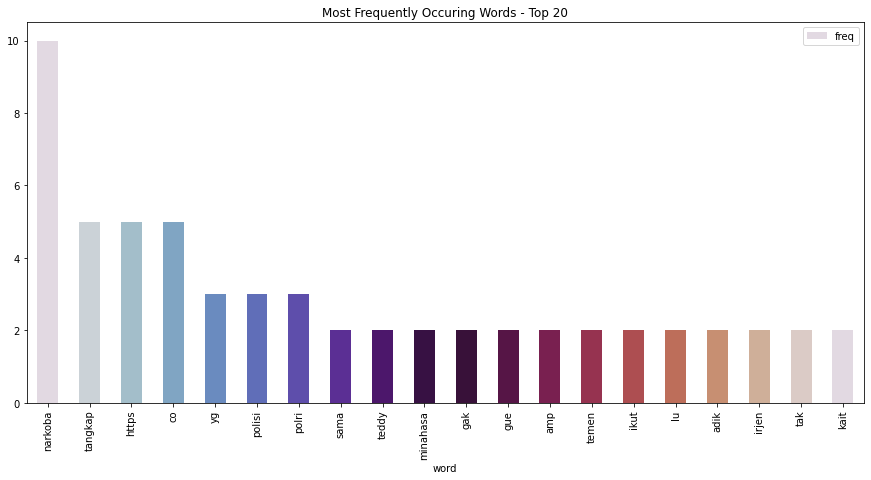

In [32]:
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
cv = CountVectorizer()
words = cv.fit_transform(documents_clean)
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

color = plt.cm.twilight(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = color)
plt.title("Most Frequently Occuring Words - Top 20")

In [33]:
from sklearn.cluster import KMeans
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(words)

KMeans(max_iter=100, n_clusters=3, n_init=1)

**Menampilkan hasil cluster.**

In [35]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names()

for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")

Cluster 0:
 https
 co
 polri
 teddy
 mafia
 tempat
 tak
 narkoba
 junimart
 tubuh
Cluster 1:
 narkoba
 tangkap
 yg
 https
 co
 polisi
 gue
 keji
 amp
 polri
Cluster 2:
 gak
 zi
 gubris
 isilop
 seksual
 sekarang
 hp
 hilang
 boleh
 mau




**Memasukkan prediksi kata tertentu.**

In [36]:
print("Prediction")
Y = cv.transform(["sabu"])
prediction = model.predict(Y)
print("Cluster number :", prediction)
Y = cv.transform(["polri"])
prediction = model.predict(Y)
print("Cluster number :", prediction)

Prediction
Cluster number : [1]
Cluster number : [1]


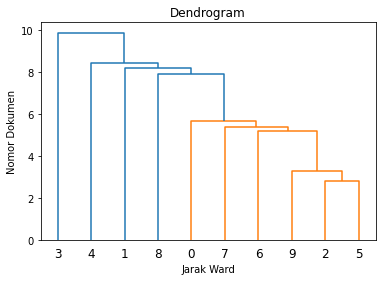

In [37]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward',metric='euclidean'),orientation="top")
plt.title('Dendrogram')
plt.xlabel('Jarak Ward')
plt.ylabel('Nomor Dokumen')
plt.show()

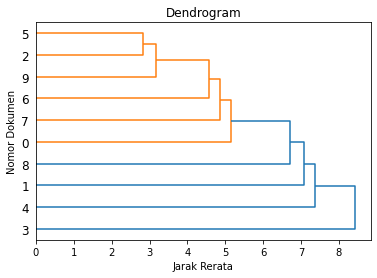

In [38]:
import scipy.cluster.hierarchy as sch
X = cv.fit_transform(documents_clean).todense()
dendrogram = sch.dendrogram(sch.linkage(X, method = 'average',metric='euclidean'),orientation="right")
plt.title('Dendrogram')
plt.xlabel('Jarak Rerata')
plt.ylabel('Nomor Dokumen')
plt.show()

**Hasil dengan algoritma Agglomerative Clustering**

In [39]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X) 
print(cluster.labels_)

[5 3 0 4 2 0 0 0 1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


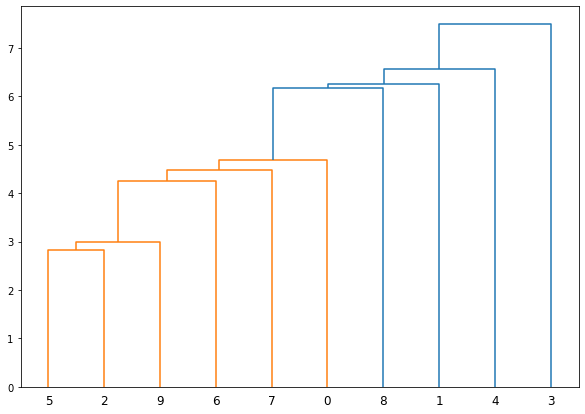

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(0, 10)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

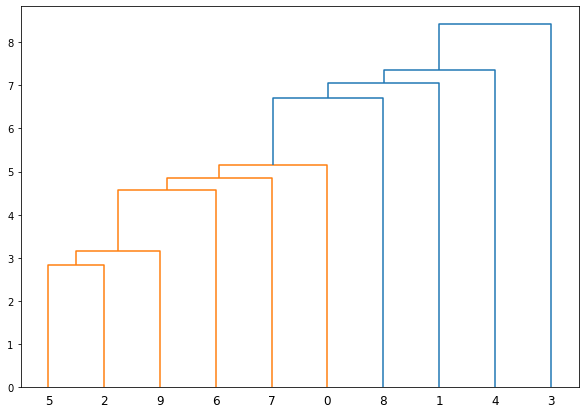

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'average')

labelList = range(0, 10)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()